In [1]:
if ("ggplot2" %in% rownames(installed.packages()) == FALSE) {
    install.packages("ggplot2") 
}
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
library(openxlsx)
library(tidyr)
library(dplyr)

Warning message:
"package 'openxlsx' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
data <- read.xlsx("./data_output/result.xlsx", detectDates = TRUE)
head(data)

Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua.and.Barbuda,Argentina,Armenia,Australian.Capital.Territory:.Australia,...,United.Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West.Bank.and.Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [4]:
data["Amount"] <- rowSums(data[4:length(colnames(data))])
head(data)

Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua.and.Barbuda,Argentina,Armenia,Australian.Capital.Territory:.Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West.Bank.and.Gaza,Yemen,Zambia,Zimbabwe,Amount
2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,557
2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,655
2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,941
2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1433
2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2118
2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2927


## Количество заражённых во всём мире

png 
  2

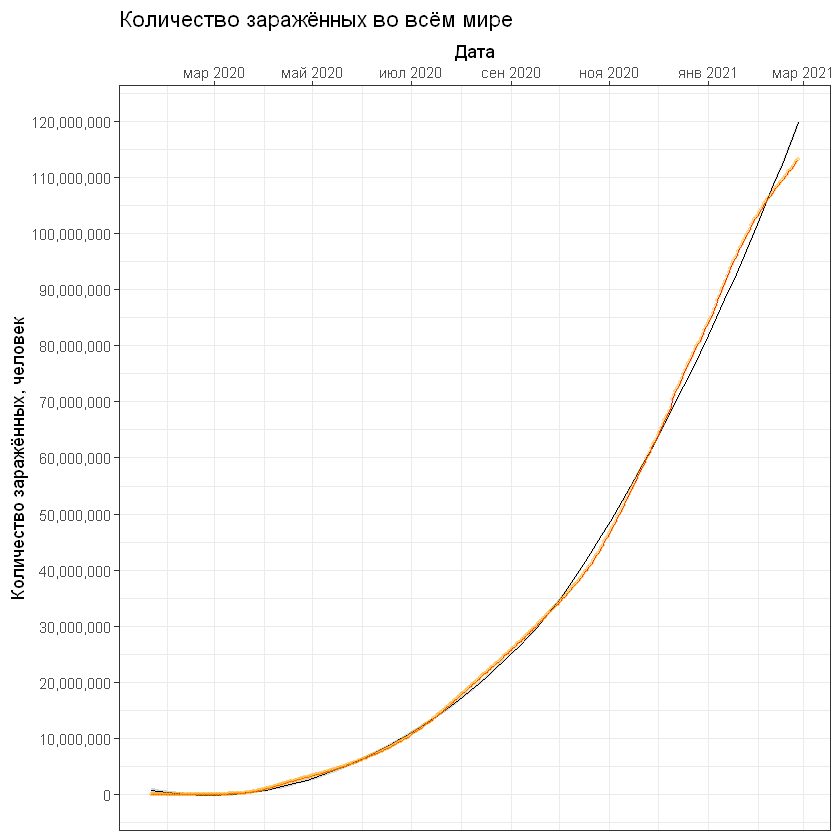

In [5]:
png("./data_output/first.png", width = 600, height = 600, units = "px")

first <- ggplot(mapping = aes(x = data[,"Date"], y = data[,"Amount"])) +
geom_smooth(colour = "black", lwd = I(0.5), method = "loess", formula = y ~ x) + 
geom_line(colour = "red") + 
geom_point(alpha = 0.3, colour = "orange", cex = I(0.7)) + 
theme_bw() + 
scale_y_continuous(n.breaks = 10, labels = scales::comma) + 
scale_x_date(position = "top", date_labels = "%b %Y", breaks = function(x) seq.Date(from = min(x), 
                                                 to = max(x), 
                                                 by = "2 month"),
                             minor_breaks = function(x) seq.Date(from = min(x), 
                                                                    to = max(x), 
                                                                    by = "1 month")) + 
labs(title = "Количество заражённых во всём мире", x = "Дата", y = "Количество заражённых, человек")             
print(first)

dev.off()
             
first

## Заражения в Израиле

png 
  2

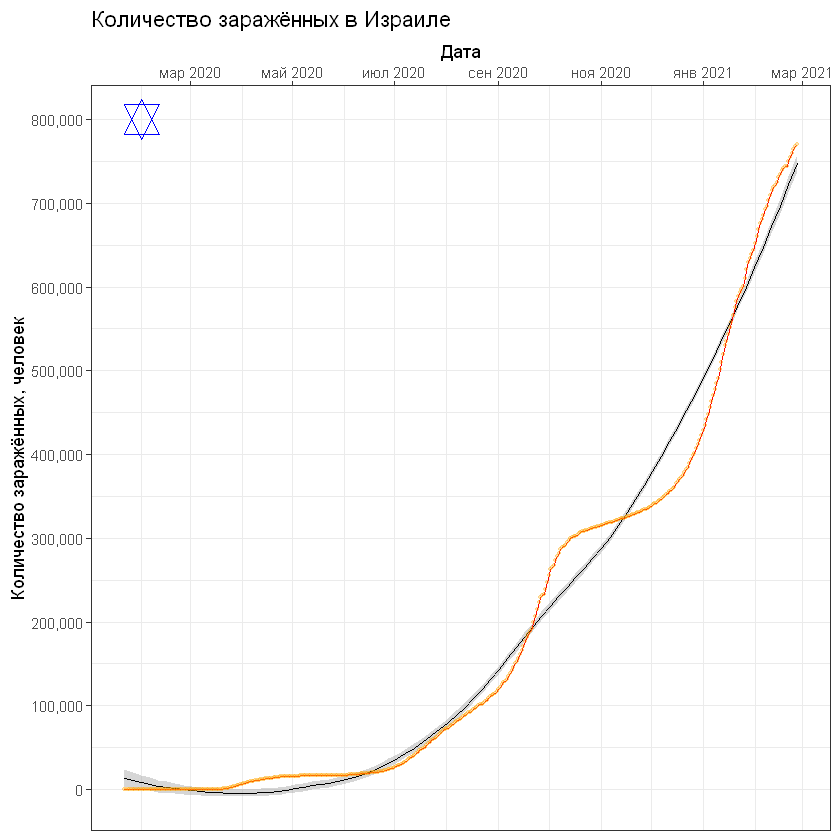

In [6]:
png("./data_output/second.png", width = 600, height = 600, units = "px")

second <- ggplot(mapping = aes(x = data[,"Date"], y = data[,"Israel"])) +
geom_smooth(lwd = I(0.5), method = "loess", formula = y ~ x, colour = "black") + 
geom_line(colour = "red") + 
geom_point(alpha = 0.3, colour = "orange", cex = I(0.7)) + 
theme_bw() + 
scale_y_continuous(n.breaks = 10, labels = scales::comma) + 
scale_x_date(position = "top", date_labels = "%b %Y", breaks = function(x) seq.Date(from = min(x), 
                                                 to = max(x), 
                                                 by = "2 month"),
                             minor_breaks = function(x) seq.Date(from = min(x), 
                                                                    to = max(x), 
                                                                    by = "1 month")) + 
geom_point(aes(x = as.Date("2020-02-01"), y = 800000), color = "blue", size = 7, shape = 11) +
labs(title = "Количество заражённых в Израиле", x = "Дата", y = "Количество заражённых, человек")             
print(second)

dev.off()
             
second

## Заражения в 

png 
  2

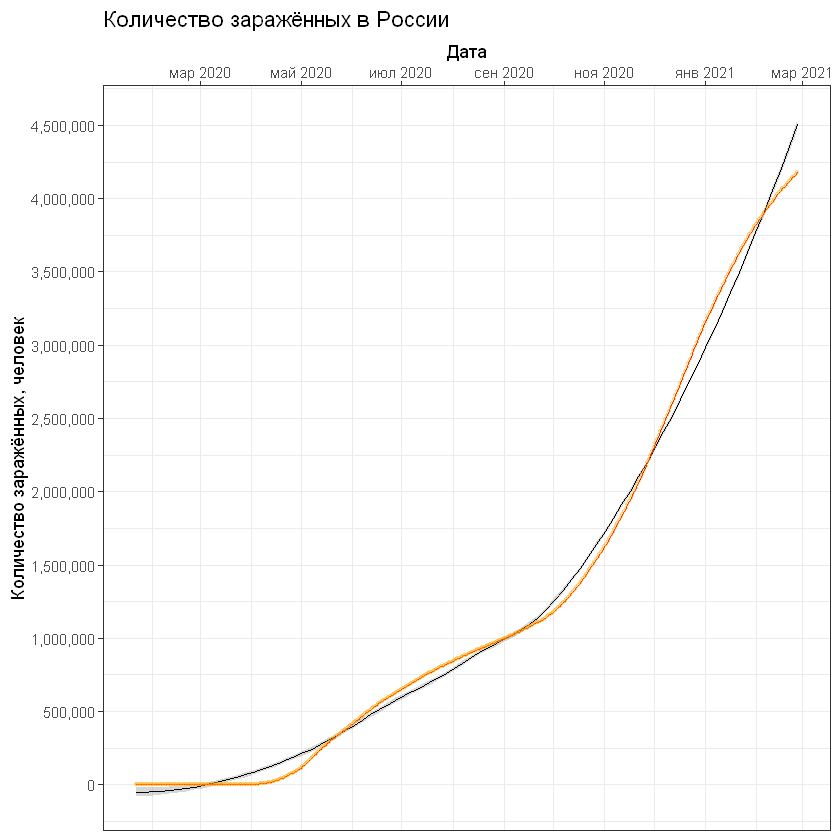

In [7]:
png("./data_output/third.png", width = 600, height = 600, units = "px")

third <- ggplot(mapping = aes(x = data[,"Date"], y = data[,"Russia"])) +
geom_smooth(colour = "black", lwd = I(0.5), method = "loess", formula = y ~ x) + 
geom_line(colour = "red") + 
geom_point(alpha = 0.3, colour = "orange", cex = I(0.7)) + 
theme_bw() + 
scale_y_continuous(n.breaks = 10, labels = scales::comma) + 
scale_x_date(position = "top", date_labels = "%b %Y", breaks = function(x) seq.Date(from = min(x), 
                                                 to = max(x), 
                                                 by = "2 month"),
                             minor_breaks = function(x) seq.Date(from = min(x), 
                                                                    to = max(x), 
                                                                    by = "1 month")) + 
labs(title = "Количество заражённых в России", x = "Дата", y = "Количество заражённых, человек")             
print(third)

dev.off()
             
third

## Три страны

png 
  2

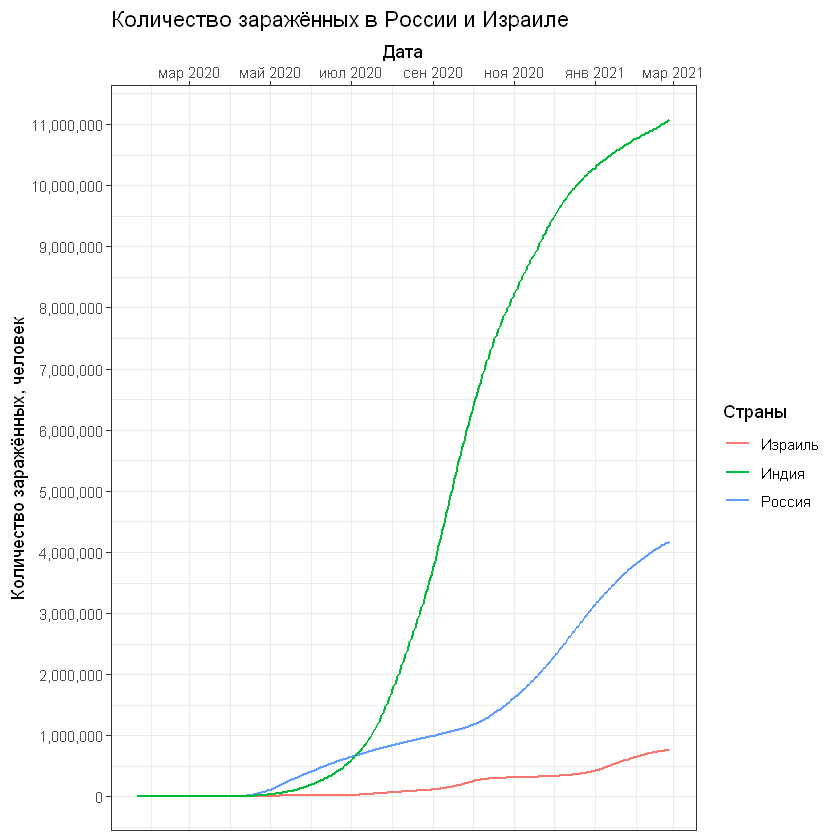

In [8]:
png("./data_output/final.png", width = 600, height = 600, units = "px")

final <- ggplot() +
geom_line(mapping = aes(x = data[,"Date"], y = data[,"Russia"], color = "Россия"), cex = I(0.7)) + 
geom_line(mapping = aes(x = data[,"Date"], y = data[,"Israel"], color = "Израиль"), cex = I(0.7)) + 
geom_line(mapping = aes(x = data[,"Date"], y = data[,"India"], color = "Индия"), cex = I(0.7)) + 
theme_bw() + 
scale_y_continuous(n.breaks = 10, labels = scales::comma) + 
scale_x_date(position = "top", date_labels = "%b %Y", breaks = function(x) seq.Date(from = min(x), 
                                                 to = max(x), 
                                                 by = "2 month"),
                             minor_breaks = function(x) seq.Date(from = min(x), 
                                                                    to = max(x), 
                                                                    by = "1 month")) + 
labs(color = "Страны", title = "Количество заражённых в России и Израиле", x = "Дата", y = "Количество заражённых, человек")
print(final)

dev.off()
             
final